![ga4](https://www.google-analytics.com/collect?v=2&tid=G-6VDTYWLKX6&cid=1&en=page_view&sid=1&dl=statmike%2Fvertex-ai-mlops%2Farchitectures%2Ftracking%2Fsetup%2Fgithub&dt=GitHub+Metrics+-+2+-+Traffic+-+Reporting+Scheduled+Query.ipynb)

# GitHub Metrics (Traffic): BQ Scheduled Query For Reporting

This notebook shows the processing of raw data in the dataset `github_metrics` into a format ready for reporting stored in the `reporting` folder.  The method used here is to schedule the query in BigQuery.  An alternative would be to include this in the could function created to incrementally update this data.

**Source Dataset** 
- `vertex-ai-mlops-369716.github_metrics`
- **Source Tables**
    - `traffic_clones`
    - `traffic_popular_paths`
    - `traffic_popular_referrers`
    - `traffic_views`
    - `stargazers`
    - `forks`
    - `subscribers`

**Destination Dataset** 
- `vertex-ai-mlops-369716.reporting`
- **Destination Tables/Views**
    - `traffic_clones`
    - `traffic_popular_paths`
    - `traffic_popular_referrers`
    - `traffic_views`
    - `stargazers`
    - `forks`
    - `subscribers`

https://cloud.google.com/bigquery/docs/scheduling-queries#set_up_scheduled_queries


---
## Colab Setup

To run this notebook in Colab click [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/statmike/vertex-ai-mlops/blob/main/architectures/tracking/setup/github/GitHub%20Metrics%20-%202%20-%20Traffic%20-%20Reporting%20Scheduled%20Query.ipynb) and run the cells in this section.  Otherwise, skip this section.

This cell will authenticate to GCP (follow prompts in the popup).

In [1]:
PROJECT_ID = 'vertex-ai-mlops-369716' # replace with project ID

In [2]:
try:
    import google.colab
    from google.colab import auth
    auth.authenticate_user()
    !gcloud config set project {PROJECT_ID}
except Exception:
    pass

Updated property [core/project].


---
## Setup

In [13]:
project = !gcloud config get-value project
PROJECT_ID = project[0]
PROJECT_ID

'statmike-mlops-349915'

In [14]:
BQ_PROJECT = PROJECT_ID

In [15]:
from datetime import datetime, timedelta
from google.cloud import bigquery

In [16]:
bq = bigquery.Client(project = PROJECT_ID)

---
## Inital Reporting Tables

For these tables it is mostly a conversion of data types for time columns and copy over to reporting.

### traffic_clones


In [ ]:
BQ_TABLE = 'traffic_clones'
query = f"""
CREATE OR REPLACE TABLE `{BQ_PROJECT}.reporting.github_{BQ_TABLE}` AS
SELECT * EXCEPT(timestamp),
    DATETIME(TIMESTAMP(timestamp)) AS timestamp
FROM `{BQ_PROJECT}.github_metrics.{BQ_TABLE}`
ORDER BY timestamp
"""
job = bq.query(query = query)
job.result()

### traffic_popular_paths

In [ ]:
BQ_TABLE = 'traffic_popular_paths'
query = f"""
CREATE OR REPLACE TABLE `{BQ_PROJECT}.reporting.github_{BQ_TABLE}` AS
SELECT * EXCEPT(timestamp),
    DATETIME(TIMESTAMP(timestamp)) AS timestamp
FROM `{BQ_PROJECT}.github_metrics.{BQ_TABLE}`
ORDER BY timestamp, count DESC
"""
job = bq.query(query = query)
job.result()

### traffic_popular_referrers

In [ ]:
BQ_TABLE = 'traffic_popular_referrers'
query = f"""
CREATE OR REPLACE TABLE `{BQ_PROJECT}.reporting.github_{BQ_TABLE}` AS
SELECT * EXCEPT(timestamp),
    DATETIME(TIMESTAMP(timestamp)) AS timestamp
FROM `{BQ_PROJECT}.github_metrics.{BQ_TABLE}`
ORDER BY timestamp, count DESC
"""
job = bq.query(query = query)
job.result()

### traffic_views

In [ ]:
BQ_TABLE = 'traffic_views'
query = f"""
CREATE OR REPLACE TABLE `{BQ_PROJECT}.reporting.github_{BQ_TABLE}` AS
SELECT * EXCEPT(timestamp),
    DATETIME(TIMESTAMP(timestamp)) AS timestamp
FROM `{BQ_PROJECT}.github_metrics.{BQ_TABLE}`
ORDER BY timestamp
"""
job = bq.query(query = query)
job.result()

### stargazers

In [ ]:
BQ_TABLE = 'stargazers'
query = f"""
CREATE OR REPLACE TABLE `{BQ_PROJECT}.reporting.github_{BQ_TABLE}` AS
SELECT * EXCEPT(added, dropped),
    DATETIME(TIMESTAMP(added)) AS added,
    DATETIME(TIMESTAMP(dropped) AS dropped
FROM `{BQ_PROJECT}.github_metrics.{BQ_TABLE}`
ORDER BY login
"""
job = bq.query(query = query)
job.result()

### forks

In [ ]:
BQ_TABLE = 'forks'
query = f"""
CREATE OR REPLACE TABLE `{BQ_PROJECT}.reporting.github_{BQ_TABLE}` AS
SELECT * EXCEPT(added, dropped),
    DATETIME(TIMESTAMP(added)) AS added,
    DATETIME(TIMESTAMP(dropped) AS dropped
FROM `{BQ_PROJECT}.github_metrics.{BQ_TABLE}`
ORDER BY full_name
"""
job = bq.query(query = query)
job.result()

### subscribers

In [ ]:
BQ_TABLE = 'subscribers'
query = f"""
CREATE OR REPLACE TABLE `{BQ_PROJECT}.reporting.github_{BQ_TABLE}` AS
SELECT * EXCEPT(added, dropped),
    DATETIME(TIMESTAMP(added)) AS added,
    DATETIME(TIMESTAMP(dropped) AS dropped
FROM `{BQ_PROJECT}.github_metrics.{BQ_TABLE}`
ORDER BY login
"""
job = bq.query(query = query)
job.result()

---
## Incremental Updates


In [7]:
yesterday = (datetime.now() - timedelta(days = 1)).strftime("%Y-%m-%dT00:00:00Z")
yesterday

'2023-02-26T00:00:00Z'

### traffic_clones
Check for updates to most recent records and any newer records based on `timestamp`

In [20]:
BQ_TABLE = 'traffic_clones'
query_1 = f"""
SELECT * EXCEPT(timestamp),
    DATETIME(TIMESTAMP(timestamp)) AS timestamp
FROM `{BQ_PROJECT}.github_metrics.{BQ_TABLE}`
WHERE timestamp >= '{yesterday}'
ORDER BY timestamp;
"""
bq.query(query = query_1).to_dataframe()

In [21]:
query_1 = f"""
DELETE FROM `{BQ_PROJECT}.reporting.github_{BQ_TABLE}` WHERE timestamp >= '{yesterday}';
INSERT INTO `{BQ_PROJECT}.reporting.github_{BQ_TABLE}`{query_1}
"""
print(query_1)


DELETE FROM `statmike-mlops-349915.reporting.github_traffic_clones` WHERE timestamp >= '2023-02-26T00:00:00Z';
INSERT INTO `statmike-mlops-349915.reporting.github_traffic_clones`
SELECT * EXCEPT(timestamp),
    DATETIME(TIMESTAMP(timestamp)) AS timestamp
FROM `statmike-mlops-349915.github_metrics.traffic_clones`
WHERE timestamp >= '2023-02-26T00:00:00Z'
ORDER BY timestamp;




In [ ]:
job = bq.query(query = query_1)
job.result()
job.state

### traffic_popular_paths
Check for any newer records based on `timestamp`

In [ ]:
BQ_TABLE = 'traffic_popular_paths'
query_2 = f"""
SELECT * EXCEPT(timestamp),
    DATETIME(TIMESTAMP(timestamp)) AS timestamp
FROM `{BQ_PROJECT}.github_metrics.{BQ_TABLE}`
WHERE timestamp >= '{yesterday}'
ORDER BY timestamp;
"""
bq.query(query = query_2).to_dataframe()

In [ ]:
query_2 = f"""
DELETE FROM `{BQ_PROJECT}.reporting.github_{BQ_TABLE}` WHERE timestamp >= '{yesterday}';
INSERT INTO `{BQ_PROJECT}.reporting.github_{BQ_TABLE}`{query_2}
"""
print(query_2)

In [ ]:
job = bq.query(query = query_2)
job.result()
job.state

### traffic_popular_referrers
Check for any newer records based on `timestamp`

In [ ]:
BQ_TABLE = 'traffic_popular_referrers'
query_3 = f"""
SELECT * EXCEPT(timestamp),
    DATETIME(TIMESTAMP(timestamp)) AS timestamp
FROM `{BQ_PROJECT}.github_metrics.{BQ_TABLE}`
WHERE timestamp >= '{yesterday}'
ORDER BY timestamp;
"""
bq.query(query = query_3).to_dataframe()

In [ ]:
query_3 = f"""
DELETE FROM `{BQ_PROJECT}.reporting.github_{BQ_TABLE}` WHERE timestamp >= '{yesterday}';
INSERT INTO `{BQ_PROJECT}.reporting.github_{BQ_TABLE}`{query_3}
"""
print(query_3)

In [ ]:
job = bq.query(query = query_3)
job.result()
job.state

### traffic_views
Check for updates to most recent records and any newer records based on `timestamp`

In [ ]:
BQ_TABLE = 'traffic_views'
query_4 = f"""
SELECT * EXCEPT(timestamp),
    DATETIME(TIMESTAMP(timestamp)) AS timestamp
FROM `{BQ_PROJECT}.github_metrics.{BQ_TABLE}`
WHERE timestamp >= '{yesterday}'
ORDER BY timestamp;
"""
bq.query(query = query_4).to_dataframe()

In [ ]:
query_4 = f"""
DELETE FROM `{BQ_PROJECT}.reporting.github_{BQ_TABLE}` WHERE timestamp >= '{yesterday}';
INSERT INTO `{BQ_PROJECT}.reporting.github_{BQ_TABLE}`{query_4}
"""
print(query_4)

In [ ]:
job = bq.query(query = query_4)
job.result()
job.state

### stargazers
Replace - but only if a change occured

In [ ]:
BQ_TABLE = 'stargazers'
query_5 = f"""
CREATE OR REPLACE TABLE `{BQ_PROJECT}.reporting.github_{BQ_TABLE}` AS
SELECT * EXCEPT(added, dropped),
    DATETIME(TIMESTAMP(added)) AS added,
    DATETIME(TIMESTAMP(dropped) AS dropped
FROM `{BQ_PROJECT}.github_metrics.{BQ_TABLE}`
ORDER BY login;
"""

In [ ]:
print(query_5)

In [ ]:
job = bq.query(query = query_5)
job.result()
job.state

### forks
Replace - but only if a change occured

In [ ]:
BQ_TABLE = 'forks'
query_6 = f"""
CREATE OR REPLACE TABLE `{BQ_PROJECT}.reporting.github_{BQ_TABLE}` AS
SELECT * EXCEPT(added, dropped),
    DATETIME(TIMESTAMP(added)) AS added,
    DATETIME(TIMESTAMP(dropped) AS dropped
FROM `{BQ_PROJECT}.github_metrics.{BQ_TABLE}`
ORDER BY full_name;
"""

In [ ]:
print(query_6)

In [ ]:
job = bq.query(query = query_6)
job.result()
job.state

### subscribers
Replace - but only if a change occured

In [ ]:
BQ_TABLE = 'subscribers'
query_7 = f"""
CREATE OR REPLACE TABLE `{BQ_PROJECT}.reporting.github_{BQ_TABLE}` AS
SELECT * EXCEPT(added, dropped),
    DATETIME(TIMESTAMP(added)) AS added,
    DATETIME(TIMESTAMP(dropped) AS dropped
FROM `{BQ_PROJECT}.github_metrics.{BQ_TABLE}`
ORDER BY login;
"""

In [ ]:
print(query_7)

In [ ]:
job = bq.query(query = query_7)
job.result()
job.state

---
## Schedule Query

The easiest way to schedule a single query like this is using the BigQuery console.

Two Paths to Start:
- From the query editor
- From the BigQuery > Schedule Queries > + Create Scheduled Query In Editor

Paste in the Query printed in the previous section:

In [41]:
query = query_1 + ';\n' + query_2 + ';\n' + query_3 + ';\n' + query_4 + ';\n' + query_5 + ';\n' + query_6 + ';\n' + query_7 + ';'
print(query)

INSERT INTO `vertex-ai-mlops-369716.reporting.commits_files`
  WITH
    CURRENT_COMMITS AS (SELECT sha FROM `vertex-ai-mlops-369716.reporting.commits`),
    SOURCE_COMMITS AS (SELECT sha FROM `vertex-ai-mlops-369716.github_metrics.commits`),
    NEW_COMMITS AS (SELECT SOURCE_COMMITS.sha FROM SOURCE_COMMITS WHERE NOT EXISTS (SELECT CURRENT_COMMITS.sha FROM CURRENT_COMMITS WHERE SOURCE_COMMITS.sha = CURRENT_COMMITS.sha)),
    RAW_COMMITS AS (SELECT * FROM NEW_COMMITS LEFT OUTER JOIN `vertex-ai-mlops-369716.github_metrics.commits_files` USING(sha))
  SELECT
    * EXCEPT(datetime),
    DATETIME(TIMESTAMP(datetime)) AS datetime
  FROM RAW_COMMITS
  ORDER BY datetime
;
INSERT INTO `vertex-ai-mlops-369716.reporting.commits`
  WITH
    CURRENT_COMMITS AS (SELECT sha FROM `vertex-ai-mlops-369716.reporting.commits`),
    SOURCE_COMMITS AS (SELECT sha FROM `vertex-ai-mlops-369716.github_metrics.commits`),
    NEW_COMMITS AS (SELECT SOURCE_COMMITS.sha FROM SOURCE_COMMITS WHERE NOT EXISTS (SELECT C

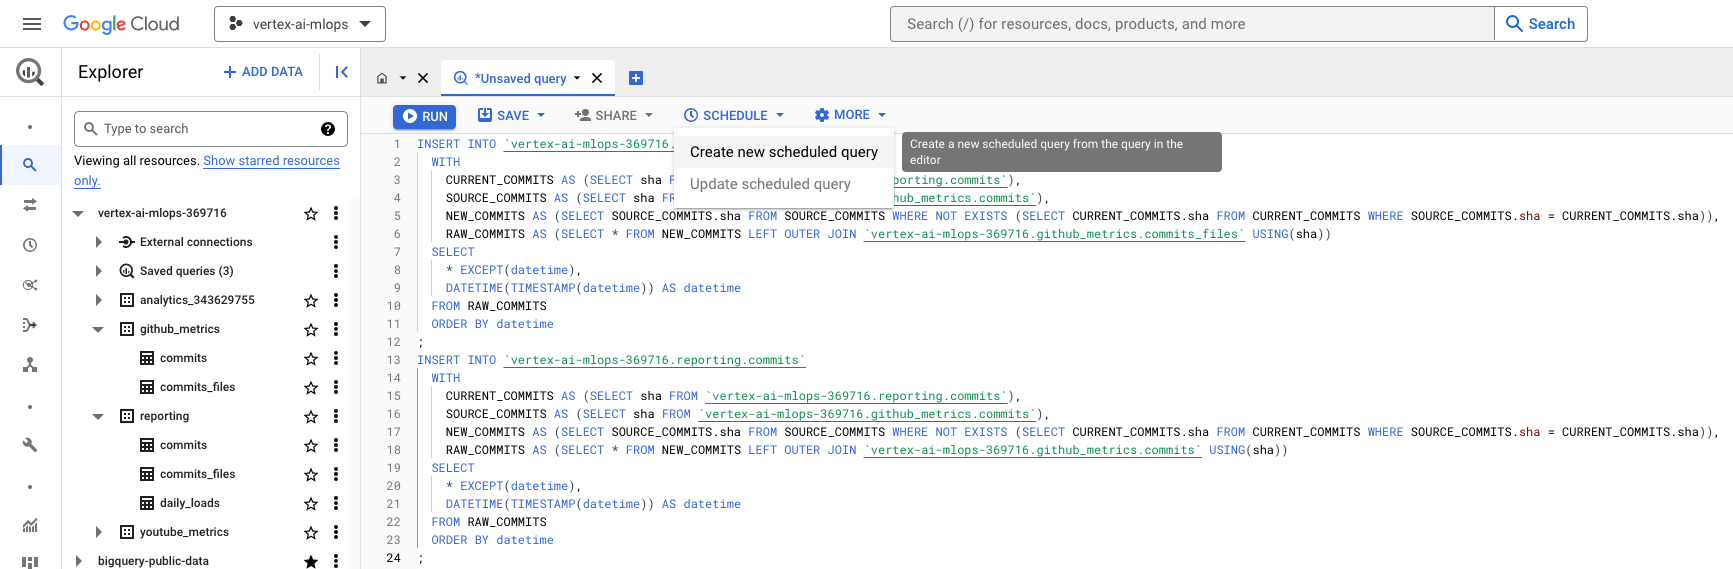

In the fly-over menu specify:
- a name for the query
- Repeat frequency, select Days to run once per day
- Enter a time to run the query in UTC.  I want this to run at 6AM EST each day so I enter 11:00 for UTC-05:00 (EST time zone)
  - The Cloud Function that updates the github metrics runs at 3AM
- other options are default/blank since the query is controlling the destination table

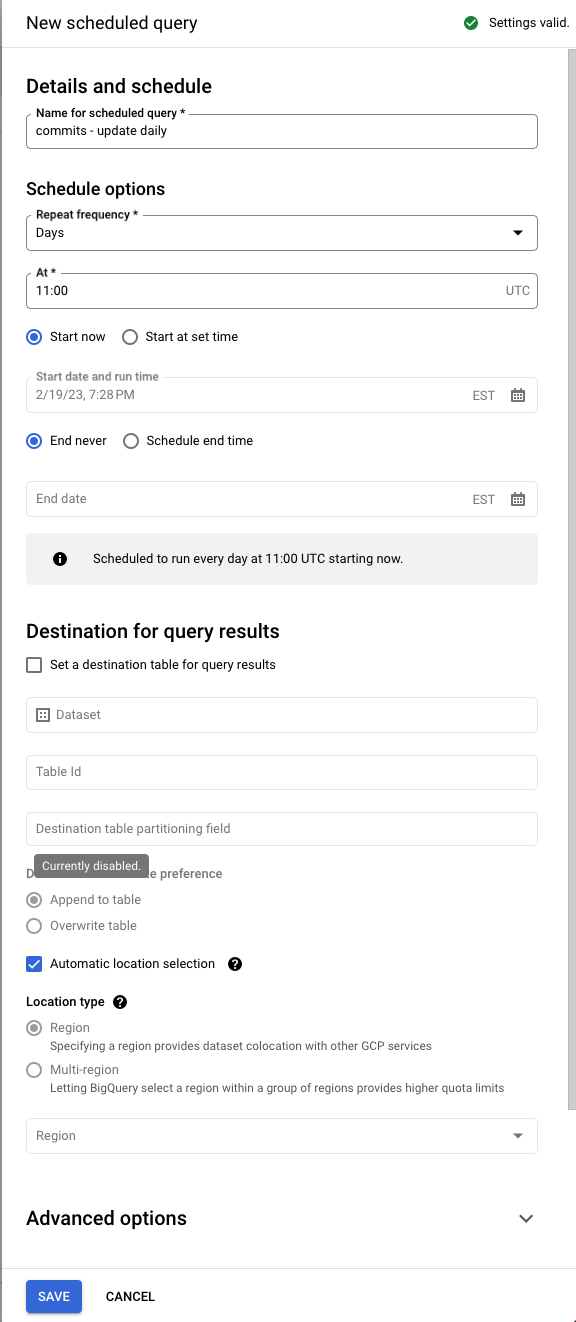

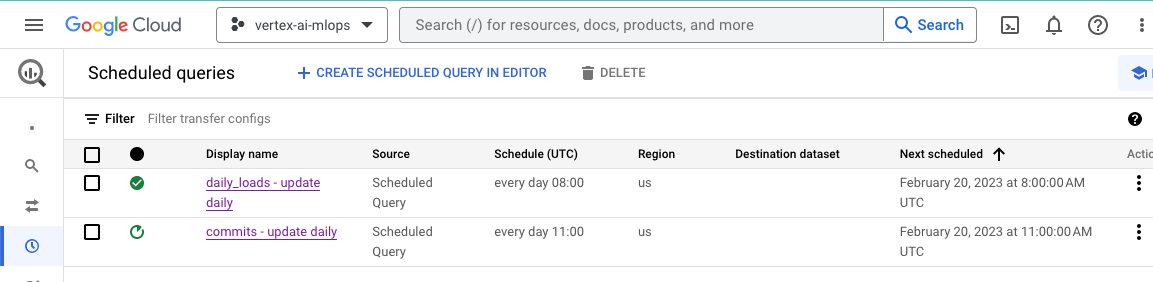

In [43]:
print(f"Link to Scheduled Query Console Page:\nhttps://console.cloud.google.com/bigquery/scheduled-queries?project={PROJECT_ID}")

Link to Scheduled Query Console Page:
https://console.cloud.google.com/bigquery/scheduled-queries?project=vertex-ai-mlops-369716
